In [2]:
import importlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import ndimage

In [3]:
from multi_loc import covariance, assimilate

In [4]:
def imshow(X, title=None, vmin=None, vmax=None, cmap=None):
    plt.figure()
    im = plt.imshow(X, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar(im)
    plt.title(title)

In [5]:
dimension = 100
rho0_l = 30
rho0_s = 3
dx = 1
H = np.eye(dimension)[::2]
y_size = H.shape[0]

rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
rho = rho*dx

In [9]:
%matplotlib inline

/anaconda3/envs/loc/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


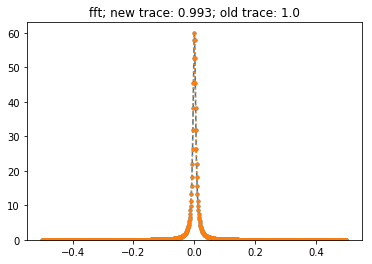

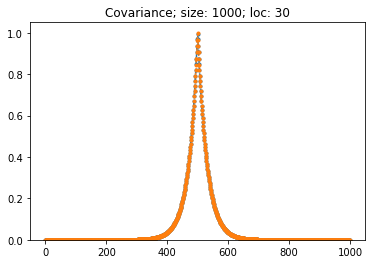

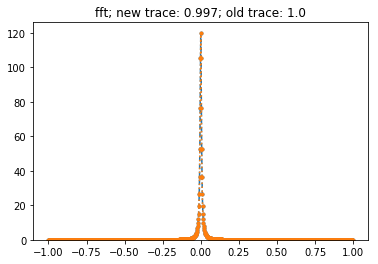

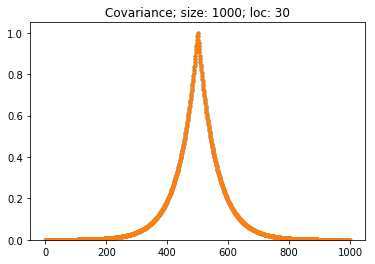

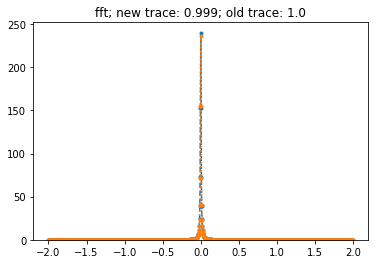

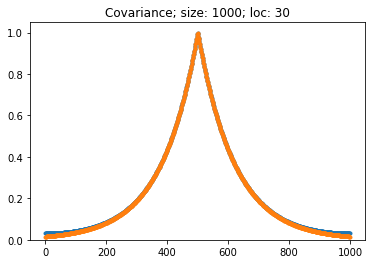

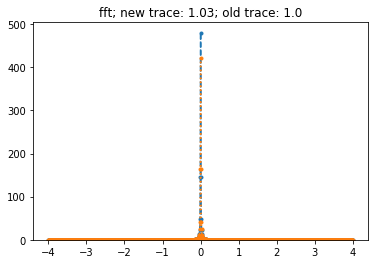

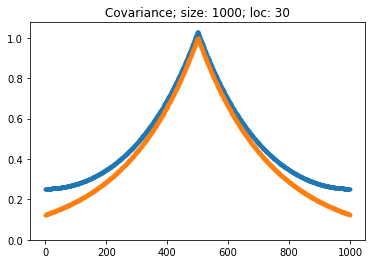

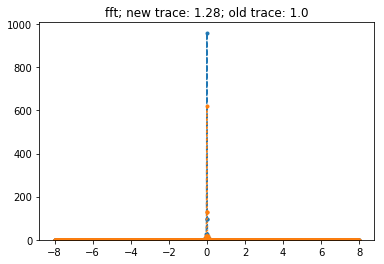

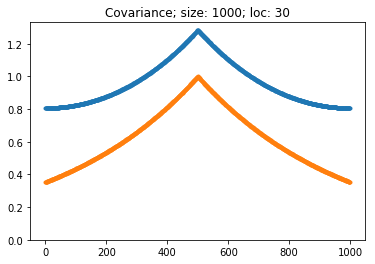

In [10]:
importlib.reload(covariance)
this_rho = 30
dimension = 1000
for dx in [1, 0.5, 0.25, 0.125, 0.0625]:
    rho = np.arange(dimension, dtype=float)
    rho = np.minimum(rho, (dimension - rho) % dimension)
    rho = rho*dx
    this = covariance.fft_exp_1d(dimension, dx, this_rho)
    k = covariance.return_waves(dimension)
    k = k/(dimension * dx)
    k = np.fft.fftshift(k)
#     xtmp = np.zeros(dimension)
#     xtmp[0] = 1
#     scale = np.fft.ifft(xtmp).real
#     this = this * scale
    # this = this*dimension/this.sum()
    that = covariance.correlation_exp(rho, this_rho)
    plt.figure()
    plt.plot(k, np.fft.fftshift(this), '--', marker='.')
    plt.plot(k, np.fft.fftshift(np.fft.fft(that)), ':', marker='.')
#     plt.xlim([-.05, .05])
    plt.ylim([0, None])
    plt.title(f'fft; new trace: {this.sum()/dimension:0.3}; '
              f'old trace: {np.fft.fft(that).real.sum()/dimension:0.3}')

    plt.figure()
    plt.plot(np.fft.ifftshift(np.fft.ifft(this)), '--', marker='.')
    plt.plot(np.fft.ifftshift(that), ':', marker='.')
    plt.ylim([0, None])
    plt.title(f'Covariance; size: {dimension}; loc: {this_rho}')


    # plt.figure()
    # plt.plot((this), '--', marker='.')
    # plt.plot((np.fft.fft(that)), ':', marker='.')
    # plt.ylim([0, None])

    # plt.figure()
    # plt.plot((np.fft.ifft(this)), '--', marker='.')
    # plt.plot((that), ':', marker='.')
    # plt.ylim([0, None])

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


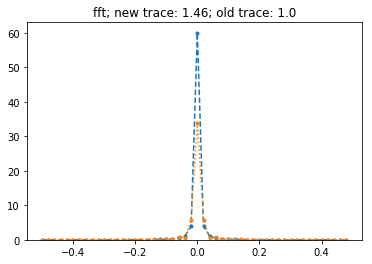

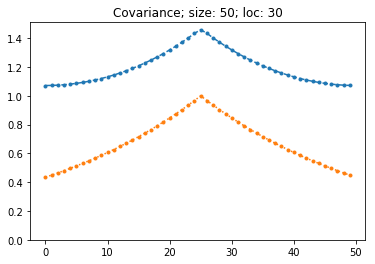

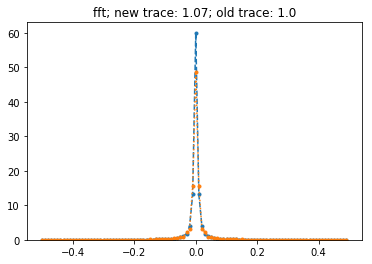

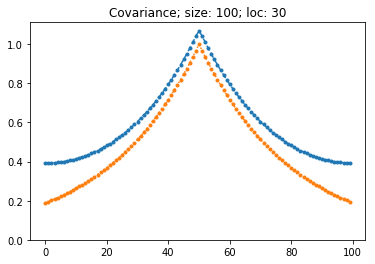

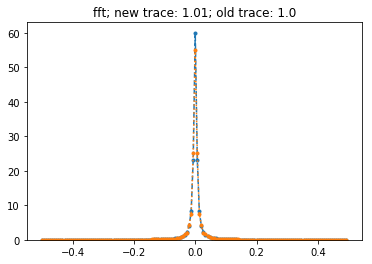

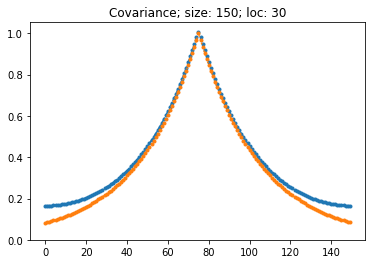

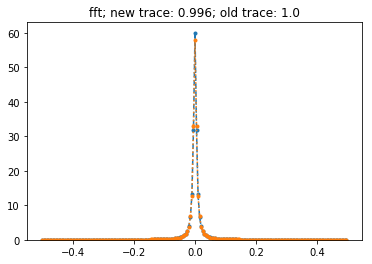

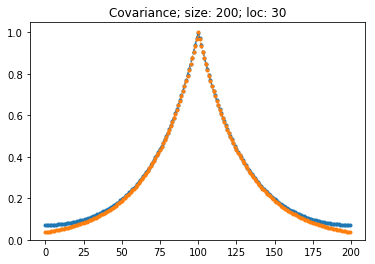

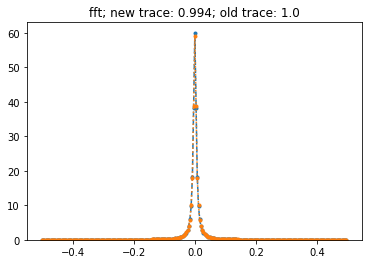

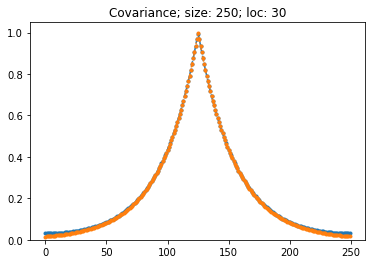

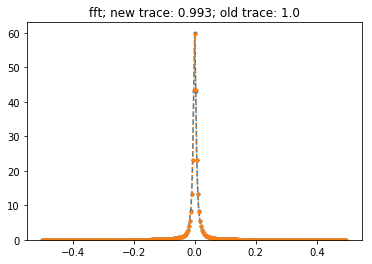

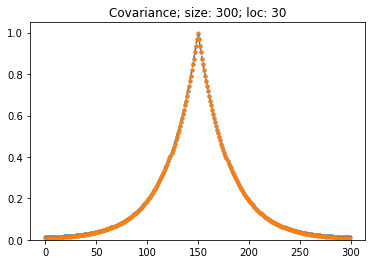

In [15]:
importlib.reload(covariance)
this_rho = 30
for dimension in [50, 100, 150, 200, 250, 300]:
    rho = np.arange(dimension, dtype=float)
    rho = np.minimum(rho, (dimension - rho) % dimension)
    rho = rho*dx
    this = covariance.fft_exp_1d(dimension, dx, this_rho)
    k = covariance.return_waves(dimension)
    k = k/(dimension * dx)
    k = np.fft.fftshift(k)
    # xtmp = np.zeros(dimension)
    # xtmp[0] = 1
    # scale = np.fft.ifft(xtmp)
    # this = this * scale
    # this = this*dimension/this.sum()
    that = covariance.correlation_exp(rho, this_rho)
    plt.figure()
    plt.plot(k, np.fft.fftshift(this), '--', marker='.')
    plt.plot(k, np.fft.fftshift(np.fft.fft(that)), ':', marker='.')
#    plt.xlim([-.05, .05])
    plt.ylim([0, None])
    plt.title(f'fft; new trace: {this.sum()/dimension:0.3}; '
              f'old trace: {np.fft.fft(that).real.sum()/dimension:0.3}')

    plt.figure()
    plt.plot(np.fft.ifftshift(np.fft.ifft(this)), '--', marker='.')
    plt.plot(np.fft.ifftshift(that), ':', marker='.')
    plt.ylim([0, None])
    plt.title(f'Covariance; size: {dimension}; loc: {this_rho}')


    # plt.figure()
    # plt.plot((this), '--', marker='.')
    # plt.plot((np.fft.fft(that)), ':', marker='.')
    # plt.ylim([0, None])

    # plt.figure()
    # plt.plot((np.fft.ifft(this)), '--', marker='.')
    # plt.plot((that), ':', marker='.')
    # plt.ylim([0, None])

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


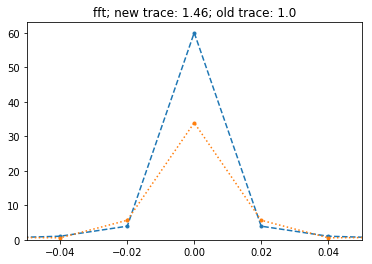

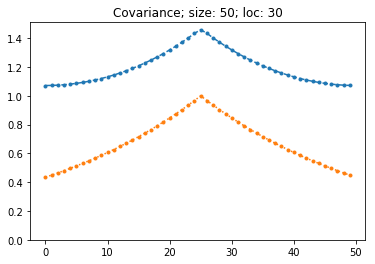

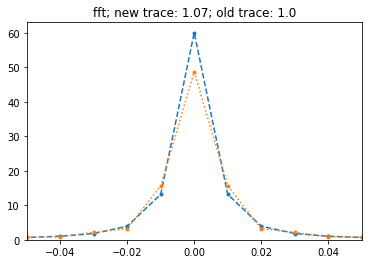

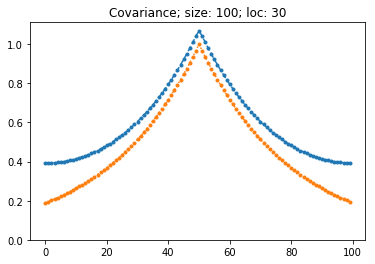

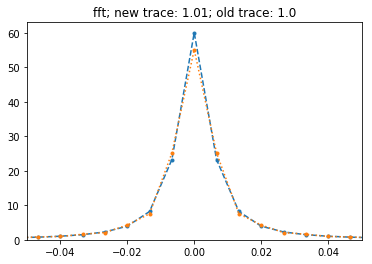

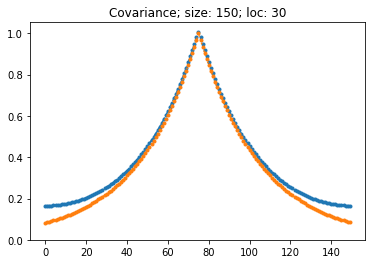

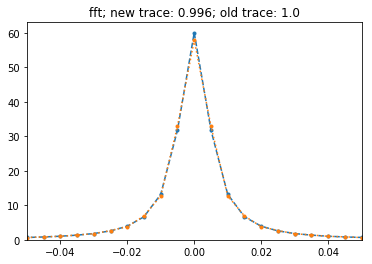

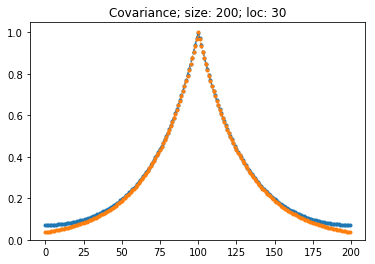

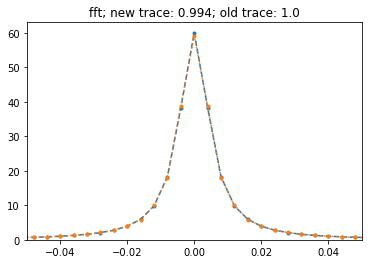

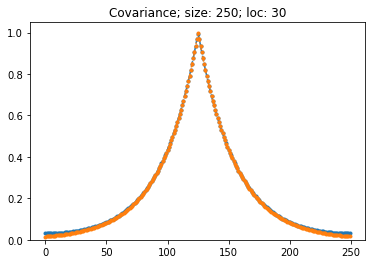

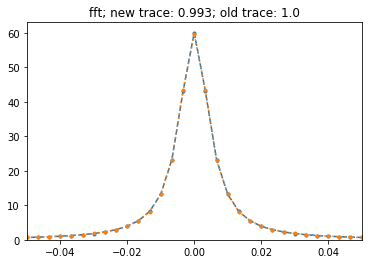

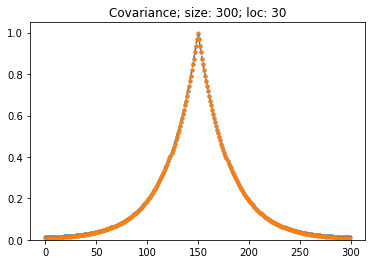

In [27]:
importlib.reload(covariance)
this_rho = 30
for dimension in [50, 100, 150, 200, 250, 300]:
    rho = np.arange(dimension, dtype=float)
    rho = np.minimum(rho, (dimension - rho) % dimension)
    rho = rho*dx
    this = covariance.fft_exp_1d(dimension, dx, this_rho)
    k = covariance.return_waves(dimension)
    k = k/(dimension * dx)
    k = np.fft.fftshift(k)
#     xtmp = np.zeros(dimension)
#     xtmp[0] = 1
#     scale = np.fft.ifft(xtmp).real
#     this = this * scale
#     this = this*dimension/this.sum()
    that = covariance.correlation_exp(rho, this_rho)
    plt.figure()
    plt.plot(k, np.fft.fftshift(this), '--', marker='.')
    plt.plot(k, np.fft.fftshift(np.fft.fft(that)), ':', marker='.')
    plt.xlim([-.05, .05])
    plt.ylim([0, None])
    plt.title(f'fft; new trace: {this.sum()/dimension:0.3}; '
              f'old trace: {np.fft.fft(that).real.sum()/dimension:0.3}')

    plt.figure()
    plt.plot(np.fft.ifftshift(np.fft.ifft(this)), '--', marker='.')
    plt.plot(np.fft.ifftshift(that), ':', marker='.')
    plt.ylim([0, None])
    plt.title(f'Covariance; size: {dimension}; loc: {this_rho}')


    # plt.figure()
    # plt.plot((this), '--', marker='.')
    # plt.plot((np.fft.fft(that)), ':', marker='.')
    # plt.ylim([0, None])

    # plt.figure()
    # plt.plot((np.fft.ifft(this)), '--', marker='.')
    # plt.plot((that), ':', marker='.')
    # plt.ylim([0, None])

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


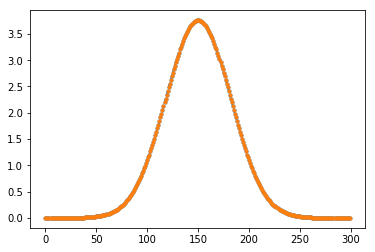

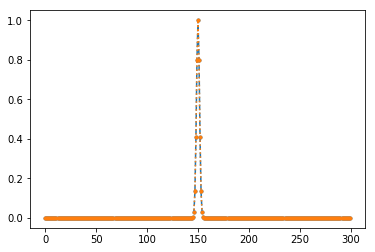

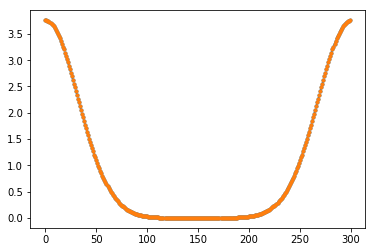

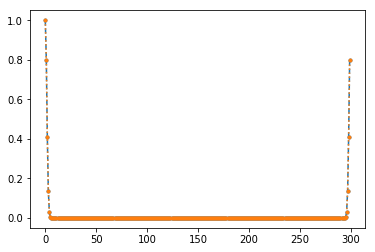

In [127]:
this_rho = rho0_s
this = covariance.fft_sqd_exp_1d(dimension, dx, this_rho)
# this = this*dimension/this.sum()
that = covariance.correlation_sqd_exp(rho, this_rho)
plt.figure()
plt.plot(np.fft.fftshift(this), '--', marker='.')
plt.plot(np.fft.fftshift(np.fft.fft(that)), ':', marker='.')

plt.figure()
plt.plot(np.fft.ifftshift(np.fft.ifft(this)), '--', marker='.')
plt.plot(np.fft.ifftshift(that), ':', marker='.')


plt.figure()
plt.plot((this), '--', marker='.')
plt.plot((np.fft.fft(that)), ':', marker='.')

plt.figure()
plt.plot((np.fft.ifft(this)), '--', marker='.')
plt.plot((that), ':', marker='.')